# Series de tiempo

 1 Importación de bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense






2 Datos nasdaq 2024
https://www.nasdaq.com/plus/coming-soon-globally


In [ ]:
import pandas as pd
url = "https://drive.google.com/file/d/1f_EBV1xiuE7mQ7tBGIzg5UnSJL195vK9/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,  delimiter=';', decimal='.')
# Convertir a tipo fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
#df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True).dt.strftime('%m/%d/%Y')
print("Dimensiones del dataset :", df.shape)


Dimensiones del dataset : (1258, 2)


<ipython-input-44-396d9fc8e362>:6: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)


In [ ]:
# ver datos
print(df.head())
print("columnas", df.columns)
print("tipo", df.dtypes)

       Fecha    Cierre
0 2024-08-13  17187.61
1 2024-08-12  16780.61
2 2024-08-09  16745.30
3 2024-08-08  16660.02
4 2024-08-07  16195.81
columnas Index(['Fecha', 'Cierre'], dtype='object')
tipo Fecha     datetime64[ns]
Cierre           float64
dtype: object


In [ ]:

# Define 'Date' como columna índice
df.set_index('Fecha', inplace=True)
# Valida el indice DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    raise ValueError("Valida el indice DatetimeIndex.")


# Seleccionar la serie de tiempo
df = df.asfreq('D')  # 'D' for daily you must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None" arises from the seasonal_decompose function because the time
ts = df['Cierre']


 3 Gráfica de la serie original:

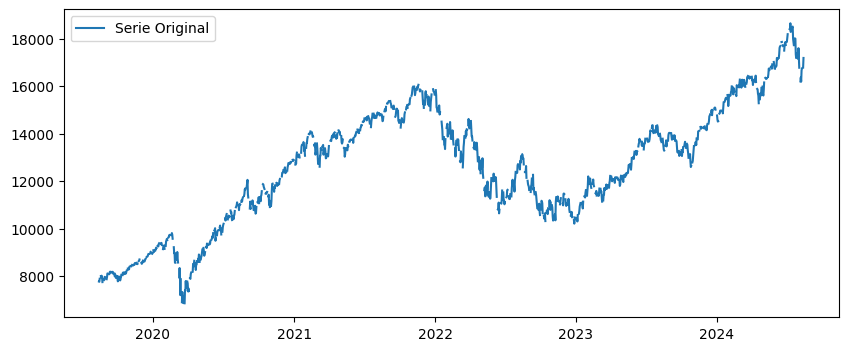

In [ ]:
#Grafica de la serie original
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Serie Original')
plt.legend()
plt.show()

===========================================================================

#Aplicación de Redes Neuronales LSTM en Series Temporales

2 División de datos

In [ ]:
ts_filled = ts.interpolate(method='linear')
train_data, test_data = train_test_split(ts_filled, test_size=0.8, shuffle=False)
display(train_data.to_string())
display(test_data.to_string())

'Fecha\n2019-08-14     7773.940000\n2019-08-15     7766.620000\n2019-08-16     7895.990000\n2019-08-17     7931.596667\n2019-08-18     7967.203333\n2019-08-19     8002.810000\n2019-08-20     7948.560000\n2019-08-21     8020.210000\n2019-08-22     7991.390000\n2019-08-23     7751.770000\n2019-08-24     7785.760000\n2019-08-25     7819.750000\n2019-08-26     7853.740000\n2019-08-27     7826.950000\n2019-08-28     7856.880000\n2019-08-29     7973.390000\n2019-08-30     7962.880000\n2019-08-31     7940.700000\n2019-09-01     7918.520000\n2019-09-02     7896.340000\n2019-09-03     7874.160000\n2019-09-04     7976.880000\n2019-09-05     8116.830000\n2019-09-06     8103.070000\n2019-09-07     8097.860000\n2019-09-08     8092.650000\n2019-09-09     8087.440000\n2019-09-10     8084.160000\n2019-09-11     8169.680000\n2019-09-12     8194.470000\n2019-09-13     8176.710000\n2019-09-14     8168.986667\n2019-09-15     8161.263333\n2019-09-16     8153.540000\n2019-09-17     8186.020000\n2019-09-18  

'Fecha\n2020-08-13    11042.500000\n2020-08-14    11019.300000\n2020-08-15    11056.110000\n2020-08-16    11092.920000\n2020-08-17    11129.730000\n2020-08-18    11210.840000\n2020-08-19    11146.460000\n2020-08-20    11264.950000\n2020-08-21    11311.800000\n2020-08-22    11334.440000\n2020-08-23    11357.080000\n2020-08-24    11379.720000\n2020-08-25    11466.470000\n2020-08-26    11665.060000\n2020-08-27    11625.340000\n2020-08-28    11695.630000\n2020-08-29    11722.240000\n2020-08-30    11748.850000\n2020-08-31    11775.460000\n2020-09-01    11939.670000\n2020-09-02    12056.440000\n2020-09-03    11458.100000\n2020-09-04    11313.130000\n2020-09-05    11196.770000\n2020-09-06    11080.410000\n2020-09-07    10964.050000\n2020-09-08    10847.690000\n2020-09-09    11141.560000\n2020-09-10    10919.590000\n2020-09-11    10853.550000\n2020-09-12    10921.250000\n2020-09-13    10988.950000\n2020-09-14    11056.650000\n2020-09-15    11190.320000\n2020-09-16    11050.470000\n2020-09-17  

3 Grafica de la serie original

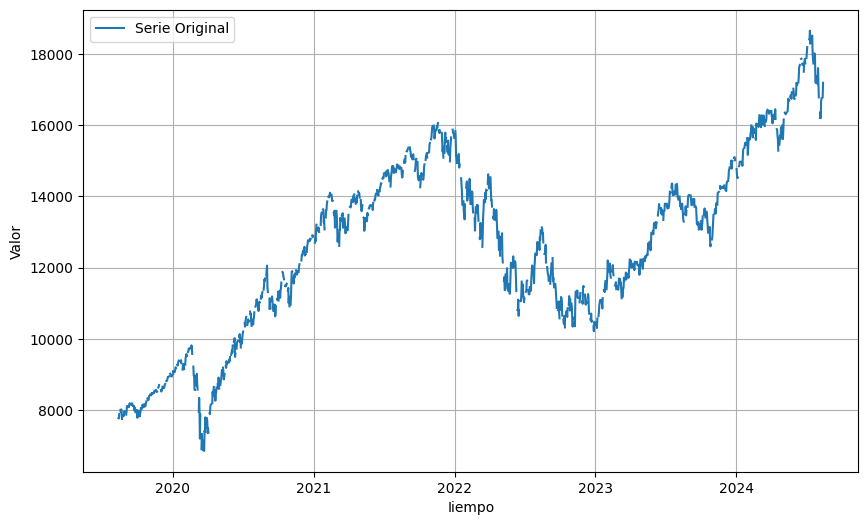

In [ ]:
#Grafica de la serie original
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Serie Original')
plt.xlabel("Iiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

4 Preparación de datos para LSTM:

In [ ]:
#Trasformamos datos en secuencias
def create_dataset(data, seq_lenght):
    X, y = [], []
    for i in range(len(data) - seq_lenght):
        X.append(data[i:i+seq_lenght])
        y.append(data[i+seq_lenght])
        return np.array(X), np.array(y)

#Se define el numero de pasos de tiempo para la serie temporal
seq_lenght = 16

#Se crea conjunto de entrenamientop y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_lenght)
X_test, y_test = create_dataset(test_data.values, seq_lenght)

<ipython-input-53-38efc16e0a8f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i+seq_lenght])


# . Construcción del modelo LSTM

In [2]:
# Cosntruccion del modelo LSTM
model = Sequential()
model.add(LSTM(32, activation='relu',
               input_shape=(seq_lenght, 1),
               return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))


NameError: name 'seq_lenght' is not defined

# 6. Compilación del modelo:

In [ ]:
model.compile(optimizer='adam', loss='mse')

7. Entrenamiento del modelo

In [ ]:
#Entrenamiento del modelo
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 87815352.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 63415304.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 64384496.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 61054820.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 87445624.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 96051560.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 101860744.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 82927456.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 66344048.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 65629024.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 65033680.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 63022596.0000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 62391796.0000
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7

8. Evaluación del modelo:

In [ ]:
#Evaluación del modelo:
Evaluacion = model.evaluate(X_test, y_test)
print (Evaluacion)
print(f'Error cuadratico medio (MSE): {Evaluacion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - loss: 41398.3398
41398.33984375
Error cuadratico medio (MSE): 41398.33984375


# 9 Prediccion

In [ ]:
print ("y_test: \n", y_test)
# Prediccion
y_pred = model.predict(X_test)
print ("y_pred: \n", y_pred)

y_test: 
 [11722.24]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
y_pred: 
 [[11518.774]]


# 10. Visualización de las predicciones

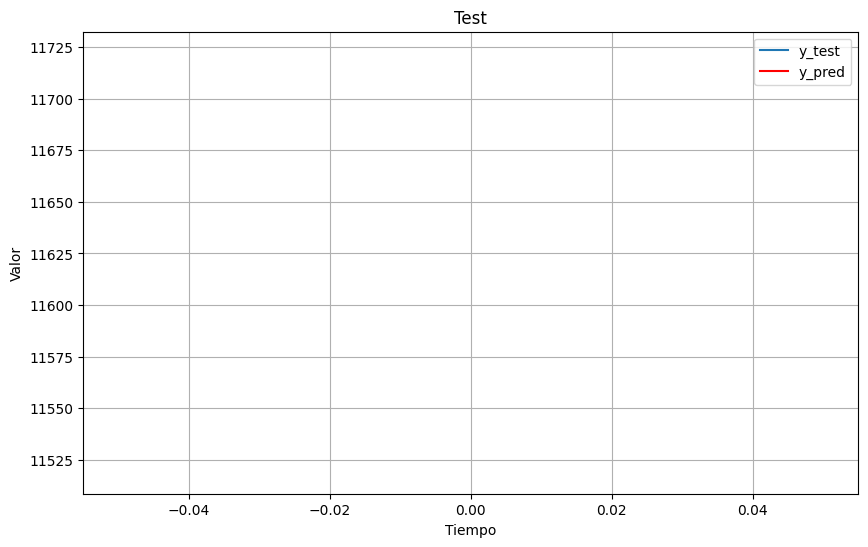

In [ ]:
# Grafica de la data de test vs pronostico de la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred', color='red')
plt.title("Test")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

=========================================================================================

4. Descomposición de la serie de tiempo

In [ ]:
#Descomposicion de la serie de tiempo
# Handle missing values before decomposition, e.g., by linear interpolation
ts_filled = ts.interpolate(method='linear')

decomposition = seasonal_decompose(ts_filled, model='additive')
#trend = decomposition.trend
#seasonal = decomposition.seasonal
#residual = decomposition.resid

5. Grafica de la secomposicion

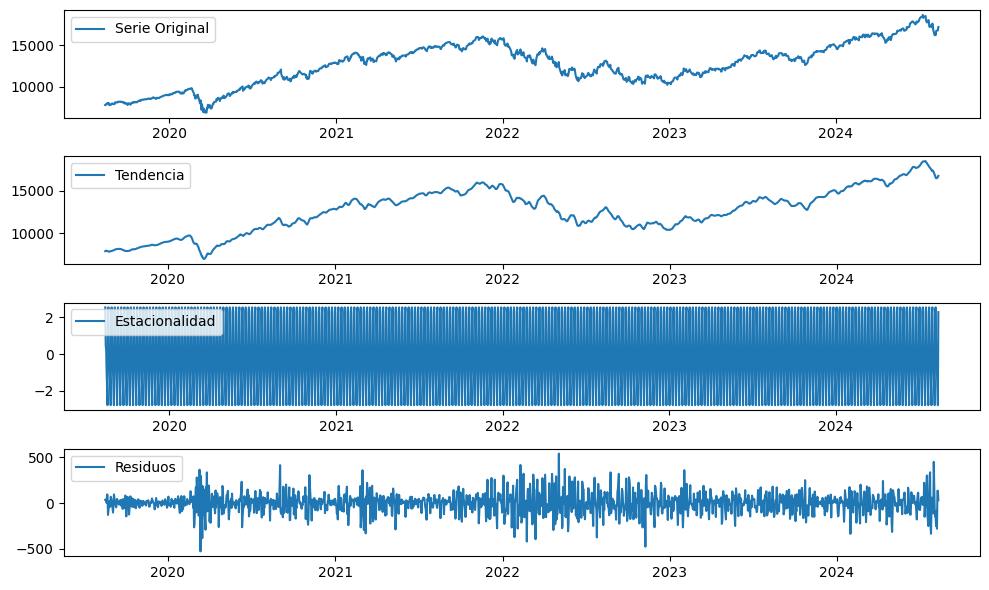

In [ ]:
#Grafica de la serie original
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(ts_filled, label='Serie Original')
plt.legend()

#Grafica de la tendencia
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend()

#Grafica de la estacionalidad
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend()

#Grafica de los residuos
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# Entrenamiento

In [ ]:
train_data, test_data = train_test_split(ts, test_size=0.3, shuffle=False)

Ajustar Modelo

In [ ]:
model = ARIMA(train_data, order=(10,1,10))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Realizar pronostico

In [ ]:
forecast = model_fit.forecast(steps=len(test_data))

Graficas

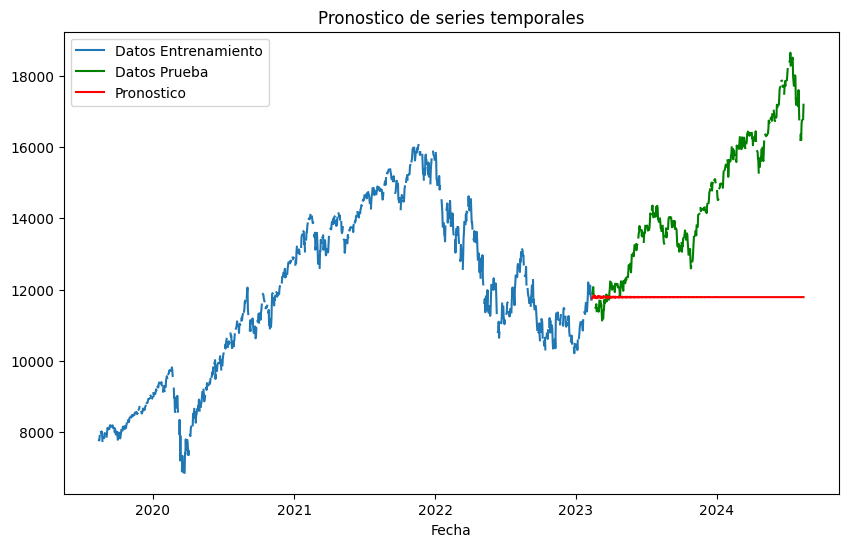

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Datos Entrenamiento')
plt.plot(test_data, label='Datos Prueba', color ='green')
plt.plot(test_data.index, forecast, label='Pronostico', color='red')
plt.legend()
plt.title("Pronostico de series temporales")
plt.xlabel("Fecha")
plt.show()